## 对数几率回归

### 一.手写模型

In [1]:
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

##### 1.定义Sigmoid函数
输入：  
x：数组  

输出：  
z：经过Sigmoid函数计算后的数组  

In [3]:
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))
    return z

##### 2.初始化维度（系数项）与截距项
输入：  
dims：训练数据变量维度  

输出：  
w：初始化权重参数值  
b：初始化偏差参数值 

In [4]:
def initialize_params(dims):
    W = np.zeros((dims, 1))
    b = 0
    return W, b

##### 3.模型主体
输入：  
X: 输入特征矩阵  
y: 输出标签向量  
W: 权值参数  
b: 偏置参数  

输出：  
a: 逻辑回归模型输出  
cost: 损失  
dW: 权值梯度  
db: 偏置梯度  

In [5]:
### 定义逻辑回归模型主体
def logistic(X, y, W, b):
    num_train = X.shape[0]                                          # 训练样本量
    num_feature = X.shape[1]                                        # 训练特征数
    a = sigmoid(np.dot(X, W) + b)                                   # 逻辑回归模型输出
    cost = -1/num_train * np.sum(y*np.log(a) + (1-y)*np.log(1-a))  # 交叉熵损失
    dW = np.dot(X.T, (a-y))/num_train                               # 权值梯度
    db = np.sum(a-y)/num_train                                      # 偏置梯度
    cost = np.squeeze(cost)                                         # 压缩损失数组维度
    return a, cost, dW, db

##### 4.训练过程
输入：  
X: 输入特征矩阵  
y: 输出标签向量  
learning_rate: 学习率  
epochs: 训练轮数  

输出：  
cost_list: 损失列表  
params: 模型参数  
grads: 参数梯度  

In [6]:
### 定义逻辑回归模型训练过程
def logistic_train(X, y, learning_rate, epochs):
    W, b = initialize_params(X.shape[1])   # 初始化模型参数
    cost_list = []   # 初始化损失列表
    # 迭代训练
    for i in range(epochs):
        a, cost, dW, db = logistic(X, y, W, b)     # 计算当前次的模型计算结果、损失和参数梯度
        # 参数更新
        W = W -learning_rate * dW
        b = b -learning_rate * db        
        # 记录损失
        if i % 100 == 0:
            cost_list.append(cost)   
        # 打印训练过程中的损失 
        if i % 100 == 0:
            print('epoch %d cost %f' % (i, cost)) 
               
    # 保存参数
    params = {            
        'W': W,            
        'b': b
    }        

    # 保存梯度
    grads = {            
        'dW': dW,            
        'db': db
    }                
    return cost_list, params, grads

##### 5.定义预测函数
输入：  
X: 输入特征矩阵  
params: 训练好的模型参数  

输出：  
y_prediction: 转换后的模型预测值  

In [7]:
### 定义预测函数
def predict(X, params):
    y_prediction = sigmoid(np.dot(X, params['W']) + params['b']) # 模型预测值
    for i in range(len(y_prediction)): # 基于分类阈值对概率预测值进行类别转换
        if y_prediction[i] > 0.5:
            y_prediction[i] = 1
        else:
            y_prediction[i] = 0
    return y_prediction

##### 6.绘图

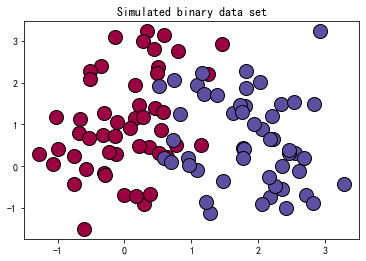

In [8]:
import matplotlib.pyplot as plt                        # 导入matplotlib绘图库
from sklearn.datasets import make_classification       # 导入生成分类数据函数
# 生成100*2的模拟二分类数据集
X, labels = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=2)

rng = np.random.RandomState(2)      # 设置随机数种子
X += 2 * rng.uniform(size=X.shape) # 对生成的特征数据添加一组均匀分布噪声
unique_lables = set(labels)                                   # 标签类别数
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_lables))) # 根据标签类别数设置颜色
for k,col in zip(unique_lables, colors):                     # 绘制模拟数据的散点图
    x_k = X[labels==k]
    plt.plot(x_k[:,0],x_k[:,1],'o',markerfacecolor=col,markeredgecolor="k", markersize=14)
plt.title('Simulated binary data set')
plt.show()

In [9]:
# 查看数据规模
print(X.shape, labels.shape)

# 数据形变
labels = labels.reshape((-1, 1))
data = np.concatenate((X, labels), axis=1)
print(data.shape)

(100, 2) (100,)
(100, 3)


In [10]:
# 训练集与测试集的简单划分
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], labels[:offset]
X_test, y_test = X[offset:], labels[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

X_train= (90, 2)
X_test= (10, 2)
y_train= (90, 1)
y_test= (10, 1)


In [11]:
# 训练模型
cost_list, params, grads = logistic_train(X_train, y_train, 0.01, 1000)

# 查看参数
print(params)

# 做预测
y_pred = predict(X_test, params)
print(y_pred)

epoch 0 cost 0.693147
epoch 100 cost 0.554066
epoch 200 cost 0.480953
epoch 300 cost 0.434738
epoch 400 cost 0.402395
epoch 500 cost 0.378275
epoch 600 cost 0.359468
epoch 700 cost 0.344313
epoch 800 cost 0.331783
epoch 900 cost 0.321216
{'W': array([[ 1.55740577],
       [-0.46456883]]), 'b': -0.5944518853151362}
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [12]:
# 使用符号函数
sigmoid(np.dot(X_test, params['W']) + params['b'])

array([[0.27936388],
       [0.92347241],
       [0.90814155],
       [0.24192851],
       [0.94789076],
       [0.98545445],
       [0.29242059],
       [0.06128463],
       [0.95821867],
       [0.46214622]])

In [13]:
# 对比测试数据的真实值和预测值，计算准确率、数据报告
from sklearn.metrics import accuracy_score, classification_report
print("准确率：",accuracy_score(y_test, y_pred))
print("数据报告：")
print(classification_report(y_test, y_pred))

准确率： 1.0
数据报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [14]:
# 自定义准确率函数
def accuracy(y_test, y_pred):
    correct_count = 0
    for i in range(len(y_test)):
        for j in range(len(y_pred)):
            if y_test[i] == y_pred[j] and i == j:
                correct_count +=1
    accuracy_score = correct_count / len(y_test)
    return accuracy_score

accuracy_score_test = accuracy(y_test, y_pred)
print(accuracy_score_test)

1.0


In [15]:
# 对训练集的数据做预测
y_train_pred = predict(X_train, params)
accuracy_score_train = accuracy(y_train, y_train_pred)
print(accuracy_score_train)

# 查看训练集数据第2条记录的第2个属性
print(X_train[1][1])

# 查看训练集前5条记录
print(X_train[:5])

0.8888888888888888
0.31055924594920103
[[ 2.17221697 -0.73380144]
 [ 2.54116921  0.31055925]
 [-0.00718884 -0.70554359]
 [-0.31285288 -0.17275221]
 [-0.67290531  0.79310561]]


##### 7.逻辑回归决策边界
输入：  
X_train: 训练集输入  
y_train: 训练集标签  
params：训练好的模型参数  

输出：  
决策边界图  

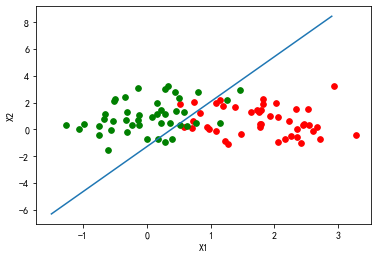

In [16]:
### 绘制逻辑回归决策边界
def plot_decision_boundary(X_train, y_train, params):
    n = X_train.shape[0]  # 训练样本量
    # 初始化类别坐标点列表
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    # 获取两类坐标点并存入列表
    for i in range(n):
        if y_train[i] == 1:
            xcord1.append(X_train[i][0])
            ycord1.append(X_train[i][1])
        else:
            xcord2.append(X_train[i][0])
            ycord2.append(X_train[i][1])
    # 创建绘图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # 绘制两类散点，以不同颜色表示
    ax.scatter(xcord1, ycord1,s=32, c='red')
    ax.scatter(xcord2, ycord2, s=32, c='green')
    # 取值范围
    x = np.arange(-1.5, 3, 0.1)
    # 决策边界公式
    y = (-params['b'] - params['W'][0] * x) / params['W'][1]
    # 绘图
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    
# plot_logistic(X_train, y_train, params)

plot_decision_boundary(X_train, y_train, params)

(90, 2) (90, 1) (10, 2) (10, 1)
epoch 0 cost 0.693147
epoch 100 cost 0.521480
epoch 200 cost 0.416359
epoch 300 cost 0.347951
epoch 400 cost 0.300680
epoch 500 cost 0.266327
epoch 600 cost 0.240328
epoch 700 cost 0.220002
epoch 800 cost 0.203687
epoch 900 cost 0.190306
{'W': array([[ 2.04608084],
       [-0.03964634]]), 'b': 0.12335926234285086}
train accuracy is: 0.9666666666666667
test accuracy is: 1.0


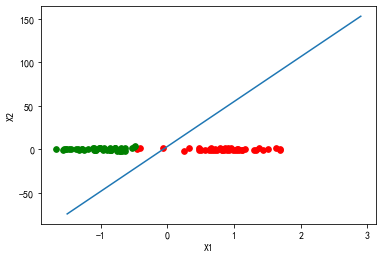

In [17]:
# 汇总
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

class logistic_regression():
    def __init__(self):
        pass
    
    # 1.符号函数
    def sigmoid(self, x):
        z = 1 / (1 + np.exp(-x))
        return z
    
    # 2.初始化参数
    def initialize_params(self, dims):
        W = np.zeros((dims, 1))
        b = 0
        return W, b
    
    # 3.逻辑回归主体函数
    def logistic(self, X, y, W, b):
        num_train = X.shape[0]
        num_feature = X.shape[1]

        a = self.sigmoid(np.dot(X, W) + b)
        cost = -1 / num_train * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))

        dW = np.dot(X.T, (a - y)) / num_train
        db = np.sum(a - y) / num_train
        cost = np.squeeze(cost)
        return a, cost, dW, db
    
    # 4.训练过程
    def logistic_train(self, X, y, learning_rate, epochs):
        W, b = self.initialize_params(X.shape[1])
        cost_list = []

        for i in range(epochs):
            a, cost, dW, db = self.logistic(X, y, W, b)
            W = W - learning_rate * dW
            b = b - learning_rate * db

            if i % 100 == 0:
                cost_list.append(cost)
            if i % 100 == 0:
                print('epoch %d cost %f' % (i, cost))

        params = {
            'W': W,
            'b': b
        }
        grads = {
            'dW': dW,
            'db': db
        }
        return cost_list, params, grads
    
    # 5.预测函数
    def predict(self, X, params):
        y_prediction = self.sigmoid(np.dot(X, params['W']) + params['b'])

        for i in range(len(y_prediction)):
            if y_prediction[i] > 0.5:
                y_prediction[i] = 1
            else:
                y_prediction[i] = 0
        return y_prediction
    
    # 6.计算准确率
    def accuracy(self, y_test, y_pred):
        correct_count = 0
        for i in range(len(y_test)):
            for j in range(len(y_pred)):
                if y_test[i] == y_pred[j] and i == j:
                    correct_count += 1

        accuracy_score = correct_count / len(y_test)
        return accuracy_score
    
    # 7.模拟数据
    def create_data(self):
        X, labels = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                                        random_state=1, n_clusters_per_class=2)
        labels = labels.reshape((-1, 1))
        offset = int(X.shape[0] * 0.9)
        X_train, y_train = X[:offset], labels[:offset]
        X_test, y_test = X[offset:], labels[offset:]
        return X_train, y_train, X_test, y_test
    
    # 8.绘制边界图
    def plot_logistic(self, X_train, y_train, params):
        n = X_train.shape[0]
        xcord1 = []
        ycord1 = []
        xcord2 = []
        ycord2 = []
        for i in range(n):
            if y_train[i] == 1:
                xcord1.append(X_train[i][0])
                ycord1.append(X_train[i][1])
            else:
                xcord2.append(X_train[i][0])
                ycord2.append(X_train[i][1])
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.scatter(xcord1, ycord1, s=32, c='red')
        ax.scatter(xcord2, ycord2, s=32, c='green')
        x = np.arange(-1.5, 3, 0.1)
        y = (-params['b'] - params['W'][0] * x) / params['W'][1]
        ax.plot(x, y)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.show()

# 入口函数
if __name__ == "__main__":
    model = logistic_regression()
    X_train, y_train, X_test, y_test = model.create_data()
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    cost_list, params, grads = model.logistic_train(X_train, y_train, 0.01, 1000)
    print(params)
    y_train_pred = model.predict(X_train, params)
    accuracy_score_train = model.accuracy(y_train, y_train_pred)
    print('train accuracy is:', accuracy_score_train)
    y_test_pred = model.predict(X_test, params)
    accuracy_score_test = model.accuracy(y_test, y_test_pred)
    print('test accuracy is:', accuracy_score_test)
    model.plot_logistic(X_train, y_train, params)

### 二.使用sklearn

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

D:\Anacondafolds\installfiles\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

